In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
print("complete")

/kaggle/input/dkrjmixed/drkg.tsv
complete


In [2]:
import sys

drkg_file = '../input/dkrjmixed/drkg.tsv'
df = pd.read_csv(drkg_file, sep ="\t", header=None)
triplets = df.values.tolist()
print("complete")

complete


In [3]:
#Assign an ID to each node (entity): create a dictionary of 
#node-types: each dictionary further consists of a dictionary 
#mapping node to an ID.
entity_dictionary = {}
def insert_entry(entry, ent_type, dic):
    if ent_type not in dic:
        dic[ent_type] = {}
    ent_n_id = len(dic[ent_type])
    if entry not in dic[ent_type]:
         dic[ent_type][entry] = ent_n_id
    return dic

for triple in triplets:
    src = triple[0]
    split_src = src.split('::')
    src_type = split_src[0]
    dest = triple[2]
    split_dest = dest.split('::')
    dest_type = split_dest[0]
    insert_entry(src,src_type,entity_dictionary)
    insert_entry(dest,dest_type,entity_dictionary)
print("complete")

complete


In [4]:
#Create a dictionary of relations: the key is the relation and 
#the value is the list of (source node ID, destimation node ID) 
#tuples.
numOfData=0
edge_dictionary={}
for triple in triplets:
    src = triple[0]
    split_src = src.split('::')
    src_type = split_src[0]
    dest = triple[2]
    split_dest = dest.split('::')
    dest_type = split_dest[0]
    
    src_int_id = entity_dictionary[src_type][src]
    dest_int_id = entity_dictionary[dest_type][dest]
    
    pair = (src_int_id,dest_int_id)
    etype = (src_type,triple[1],dest_type)
    
    
    
    
    if etype in edge_dictionary:
        edge_dictionary[etype] += [pair]
    else:
        edge_dictionary[etype] = [pair]
    #add
    
    
    numOfData+=1
    if numOfData==1000:
        break
print("complete")

complete


In [5]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

try:
    import dgl
except:
    !pip install dgl
    import dgl
    
import warnings
warnings.filterwarnings('ignore')
print("complete")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 44.3 MB/s eta 0:00:00
Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


DGL backend not selected or invalid.  Assuming PyTorch for now.


complete


In [6]:
graph = dgl.heterograph(edge_dictionary);
print("complete")

complete


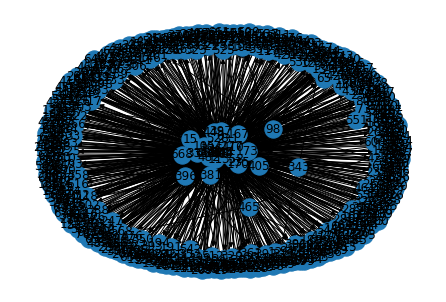

complete


In [7]:
import networkx as nx
import dgl



import matplotlib.pyplot as plt

nx.draw(graph.to_networkx(), with_labels=True)

plt.show()
print("complete")